In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path

from subprocess import Popen, PIPE, STDOUT
from glob import glob

In [2]:
base_path='./arc-prize-2024/'
# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [3]:
# Reading files
training_challenges =  load_json(base_path +'arc-agi_training_challenges.json')
training_solutions =   load_json(base_path +'arc-agi_training_solutions.json')

evaluation_challenges =load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path +'arc-agi_evaluation_solutions.json')

test_challenges =  load_json(base_path +'arc-agi_test_challenges.json')

In [5]:
print(f'Number of training challenges = {len(training_challenges)}')
print(f'Number of training solutions = {len(training_solutions)}')
print(f'Number of evaluation challenges = {len(evaluation_challenges)}')
print(f'Number of evaluation solutions = {len(evaluation_solutions)}')
print(f'Number of test challenges = {len(test_challenges)}')

Number of training challenges = 400
Number of training solutions = 400
Number of evaluation challenges = 400
Number of evaluation solutions = 400
Number of test challenges = 100


In [6]:
for i in range(5):
    t=list(training_challenges)[i]
    task=training_challenges[t]
    print(f'Set #{i}, {t}')

Set #0, 007bbfb7
Set #1, 00d62c1b
Set #2, 017c7c7b
Set #3, 025d127b
Set #4, 045e512c


In [7]:
task = training_challenges['007bbfb7']
print(task.keys())

dict_keys(['test', 'train'])


In [8]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


In [9]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

[[0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [7, 7, 7, 7, 7, 7, 7, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7]]

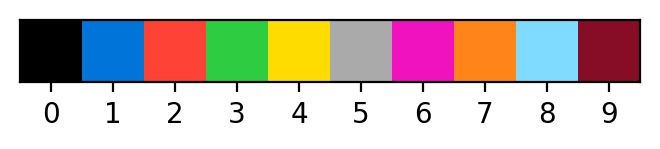

In [10]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [11]:
def plot_task(task, task_solutions, i, t):
    """    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app    """    
    
    num_train = len(task['train'])
    num_test  = len(task['test'])
    
    w=num_train+num_test
    fig, axs  = plt.subplots(2, w, figsize=(3*w ,3*2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)
    #plt.subplots_adjust(hspace = 0.15)
    #plt.subplots_adjust(wspace=20, hspace=20)
    
    for j in range(num_train):     
        plot_one(axs[0, j], j,'train', 'input')
        plot_one(axs[1, j], j,'train', 'output')        
    
    
    plot_one(axs[0, j+1], 0, 'test', 'input')


    answer = task_solutions
    input_matrix = answer
    
    axs[1, j+1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j+1].grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    axs[1, j+1].set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    axs[1, j+1].set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1].set_title('Test output')

    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, num_train+1])
    
    for m in range(1, num_train):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = 'black')
    
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = 'black')

    axs[1, j+1].axis("off")

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black') 
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()  
    
    print()
    print()
    
    
def plot_one(ax, i, train_or_test, input_or_output):
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    ax.set_title(train_or_test + ' ' + input_or_output)

#0, 007bbfb7


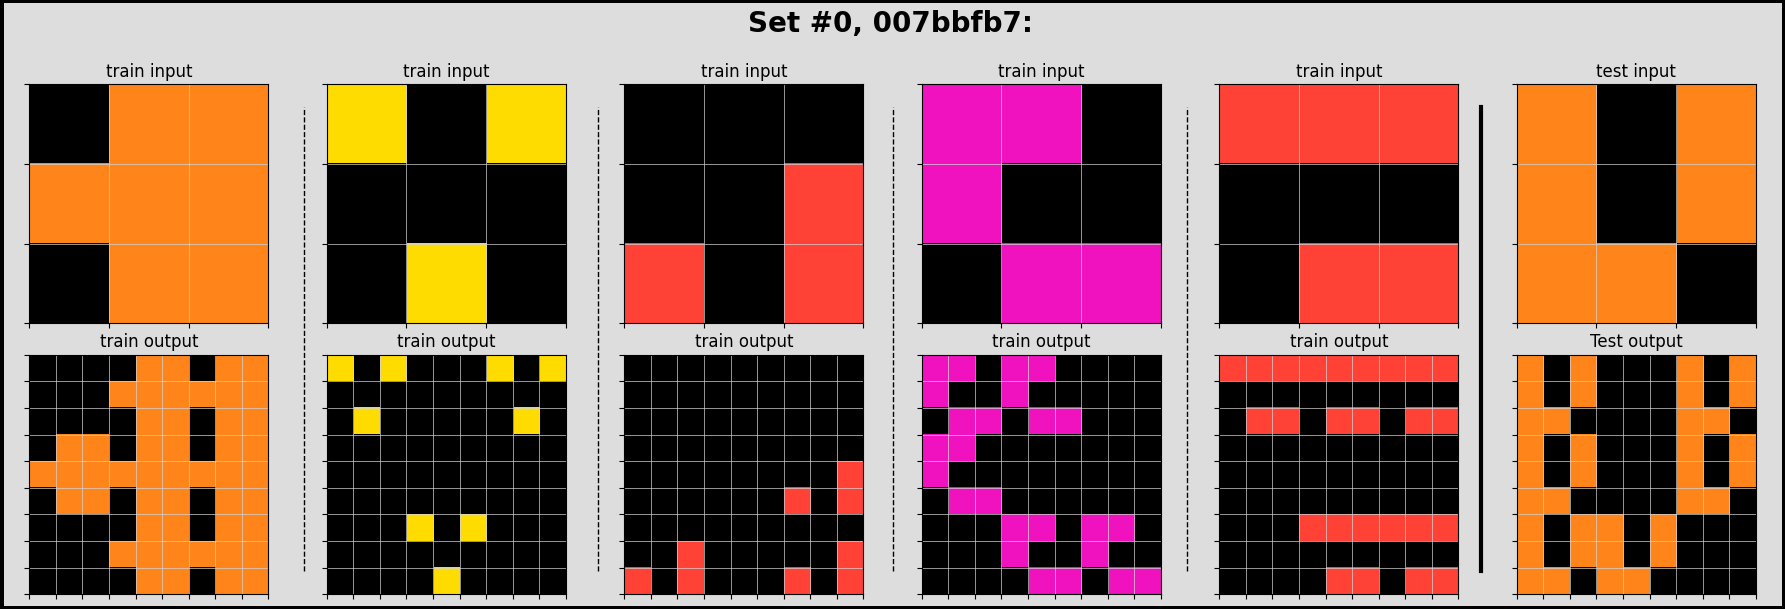



#1, 00d62c1b


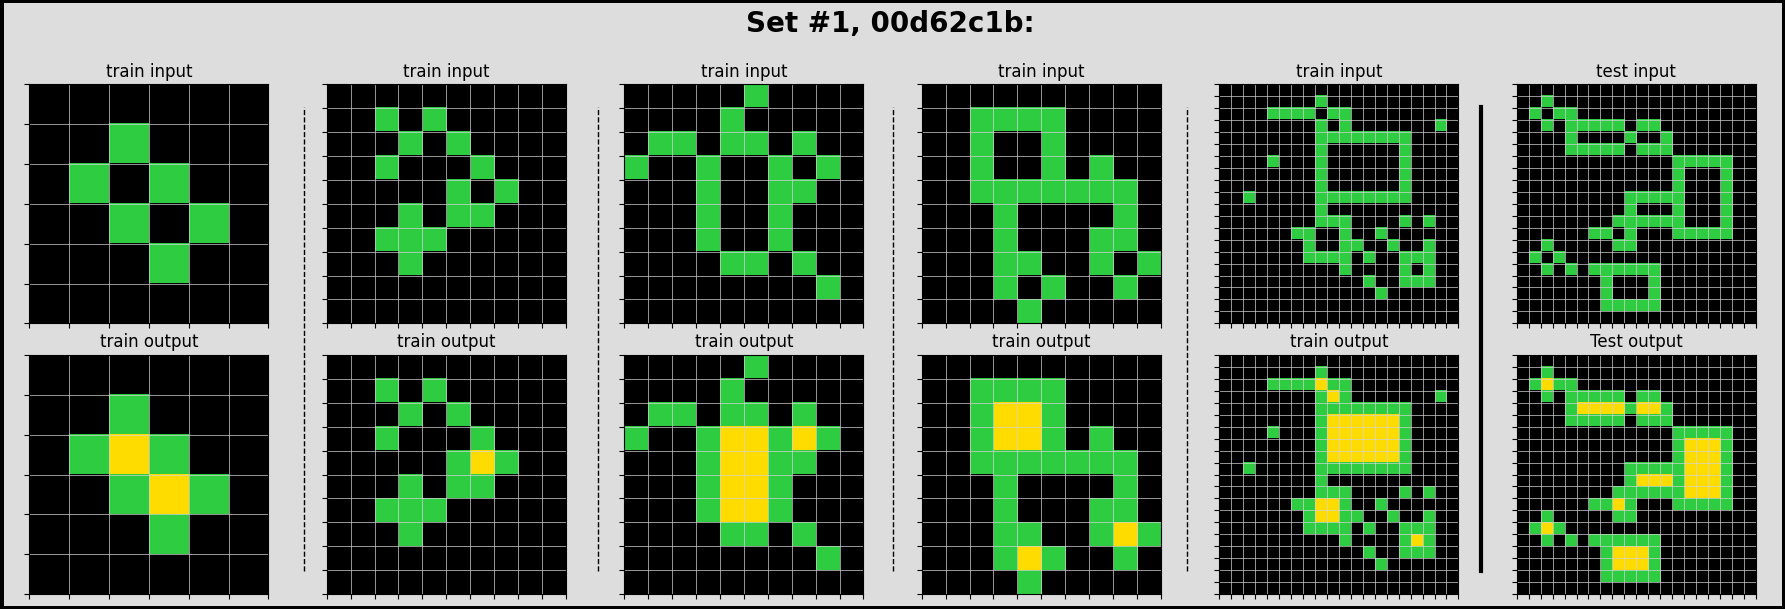



#2, 017c7c7b


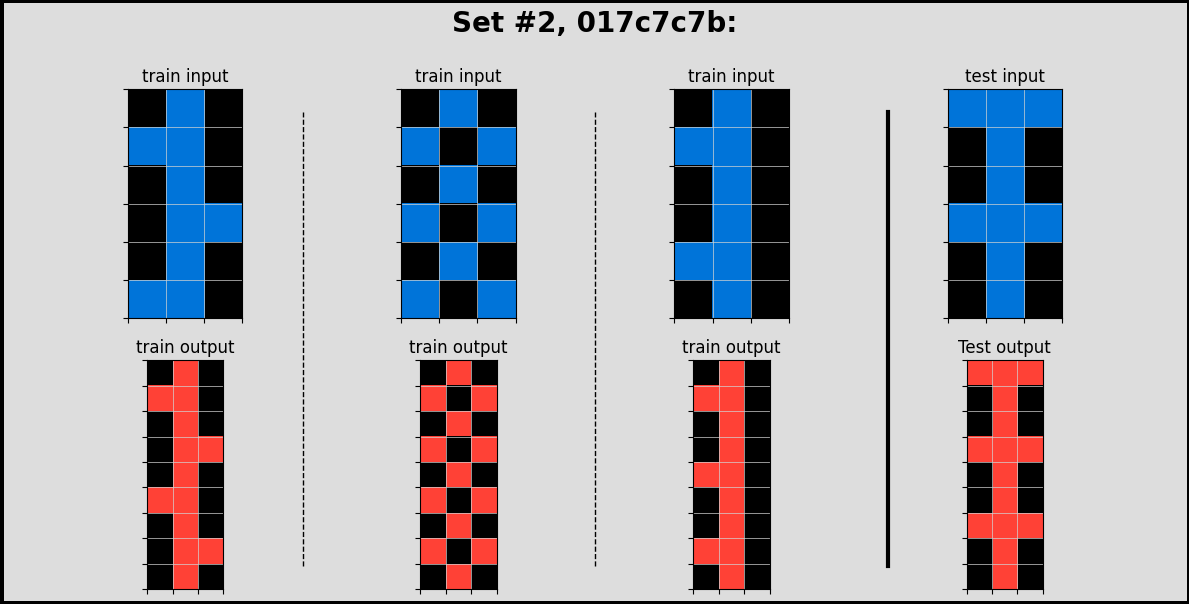



#3, 025d127b


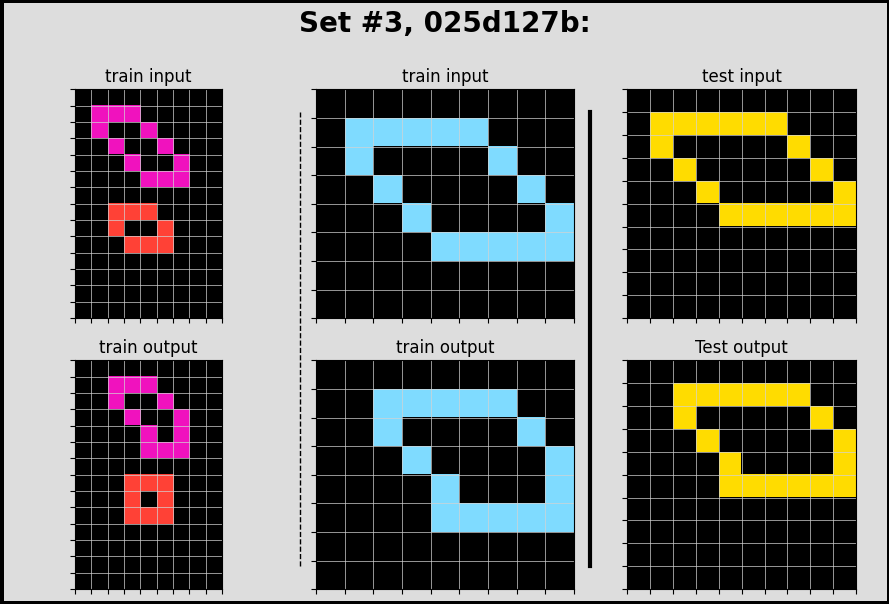



#4, 045e512c


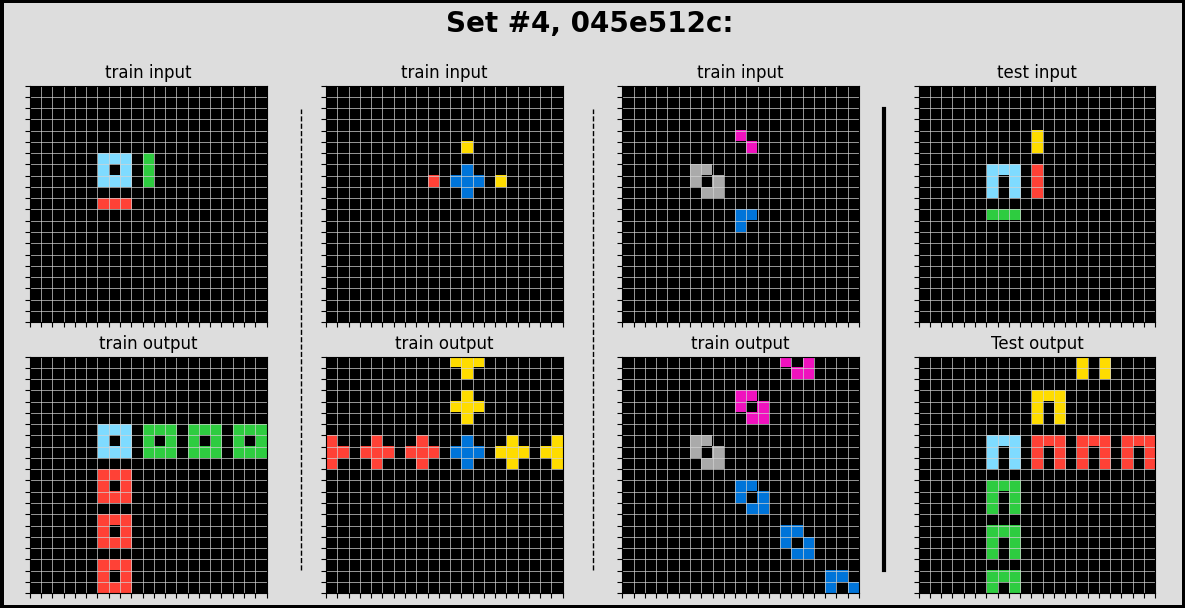



#5, 0520fde7


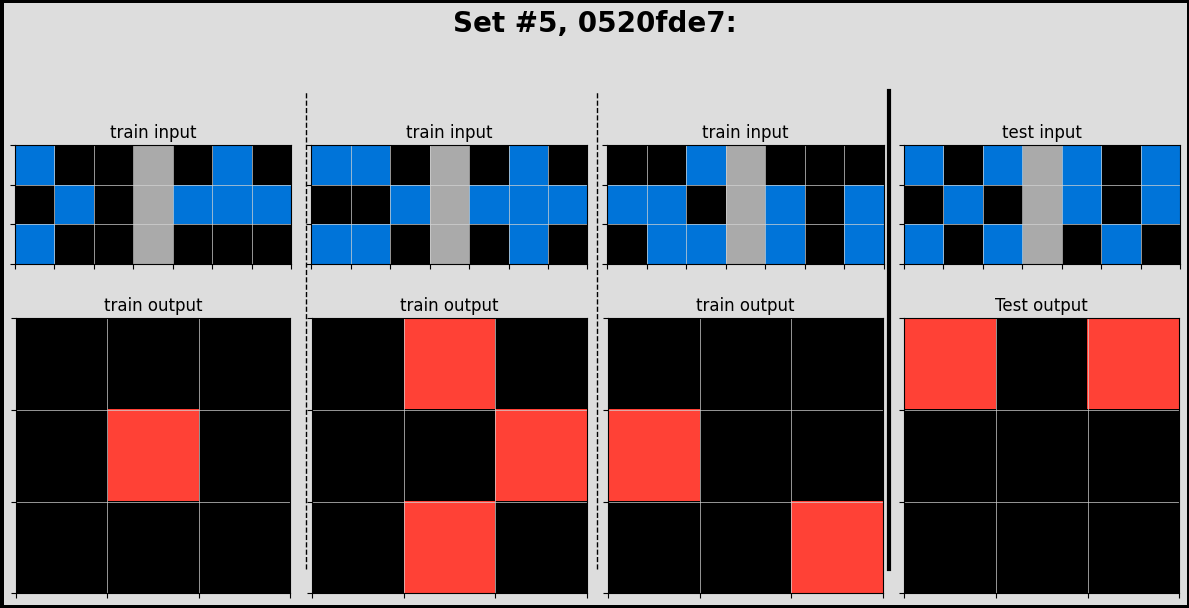



#6, 05269061


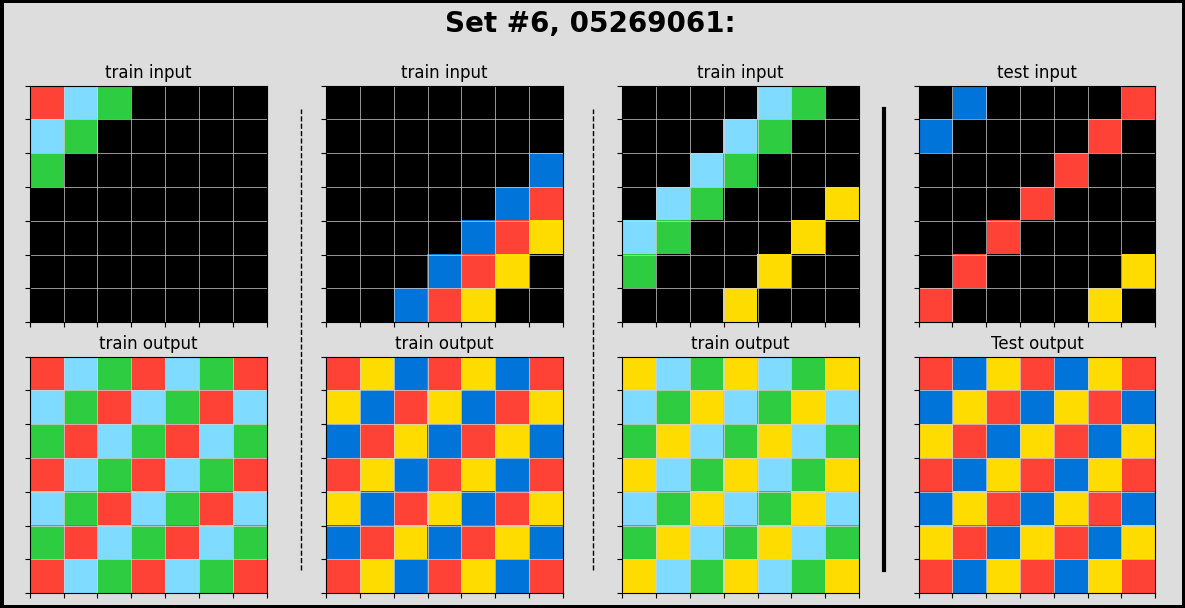



#7, 05f2a901


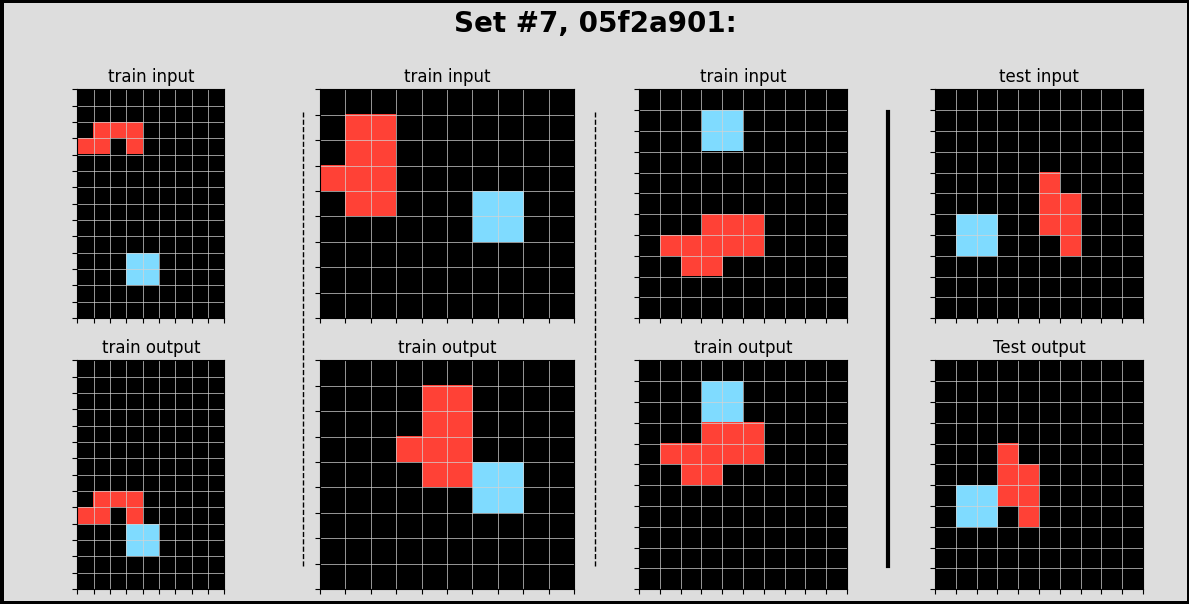



#8, 06df4c85


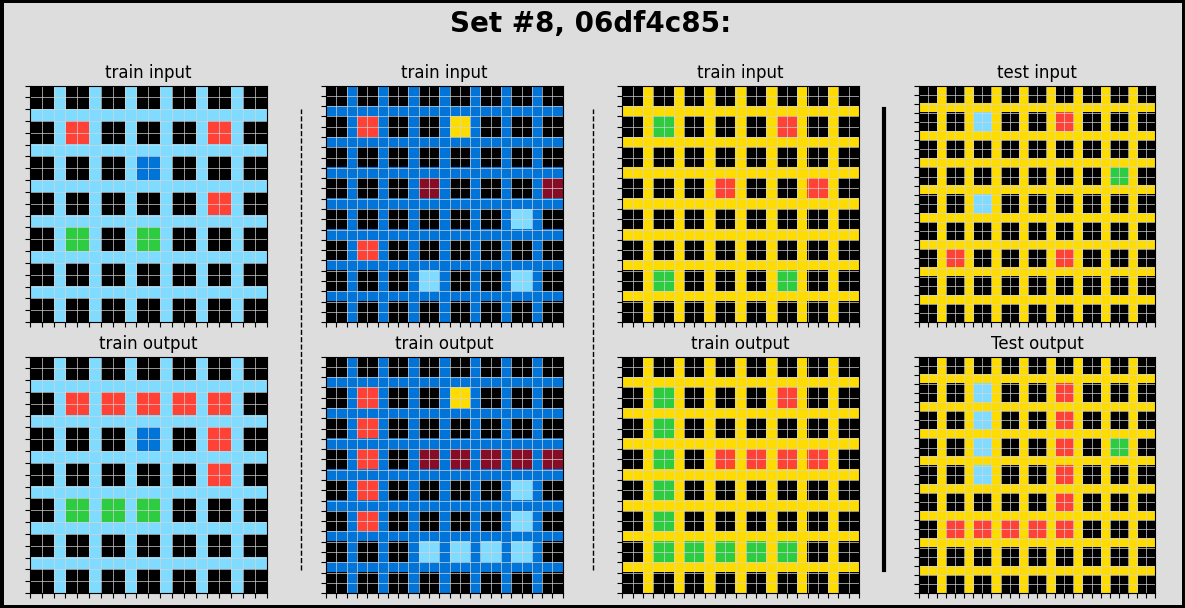



#9, 08ed6ac7


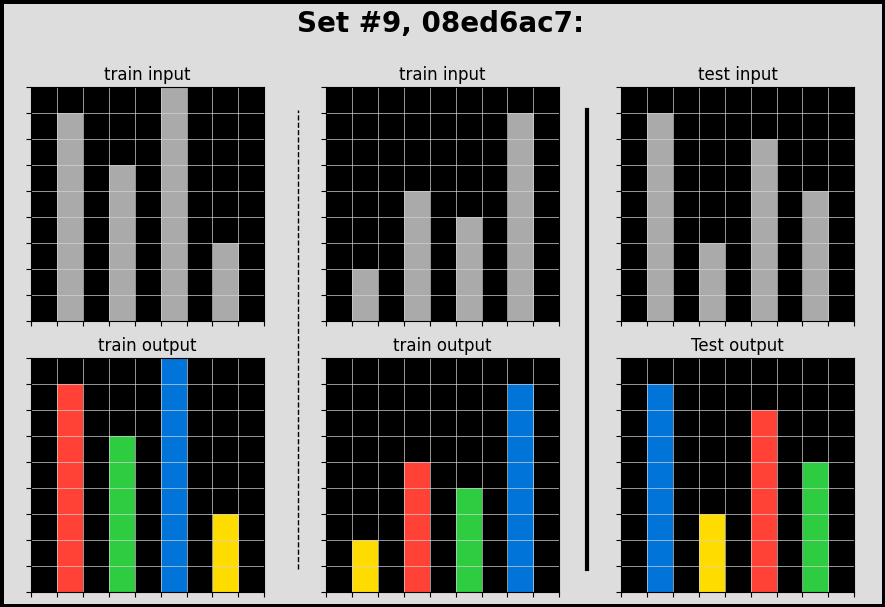



#10, 09629e4f


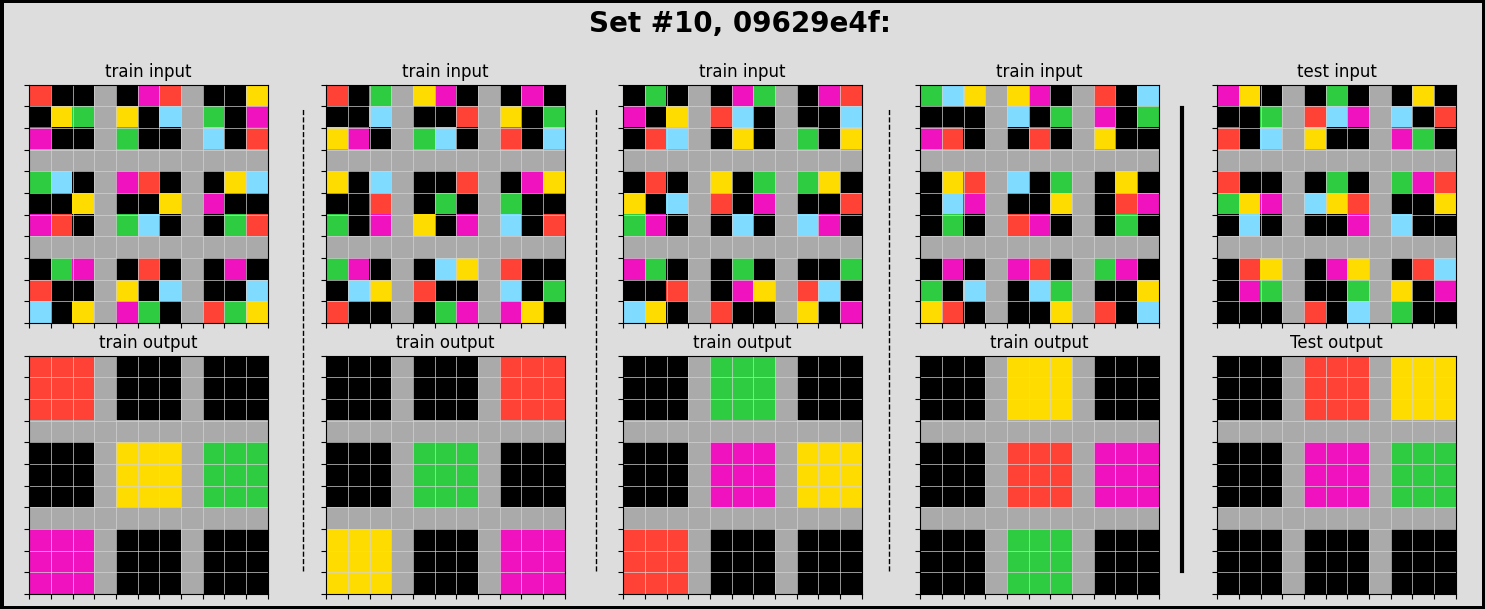



#11, 0962bcdd


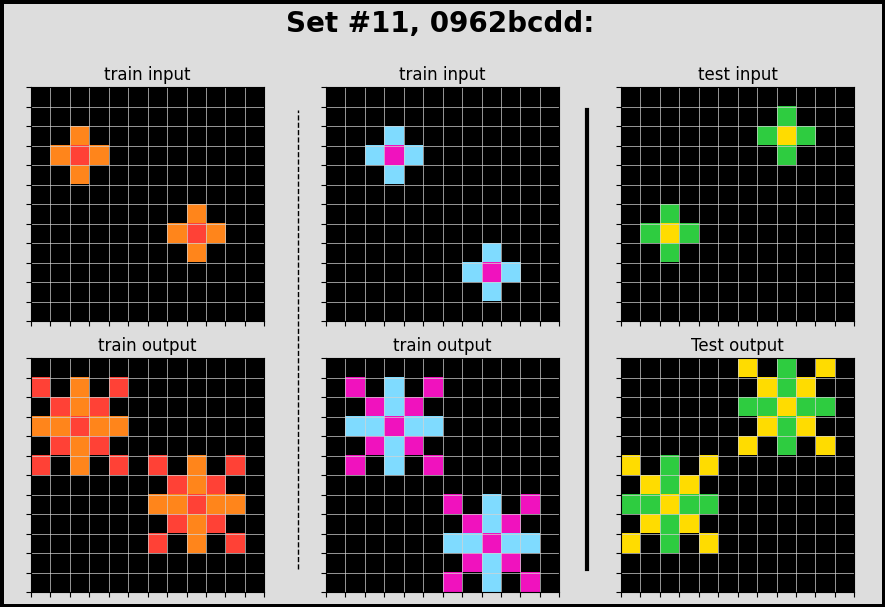



#12, 0a938d79


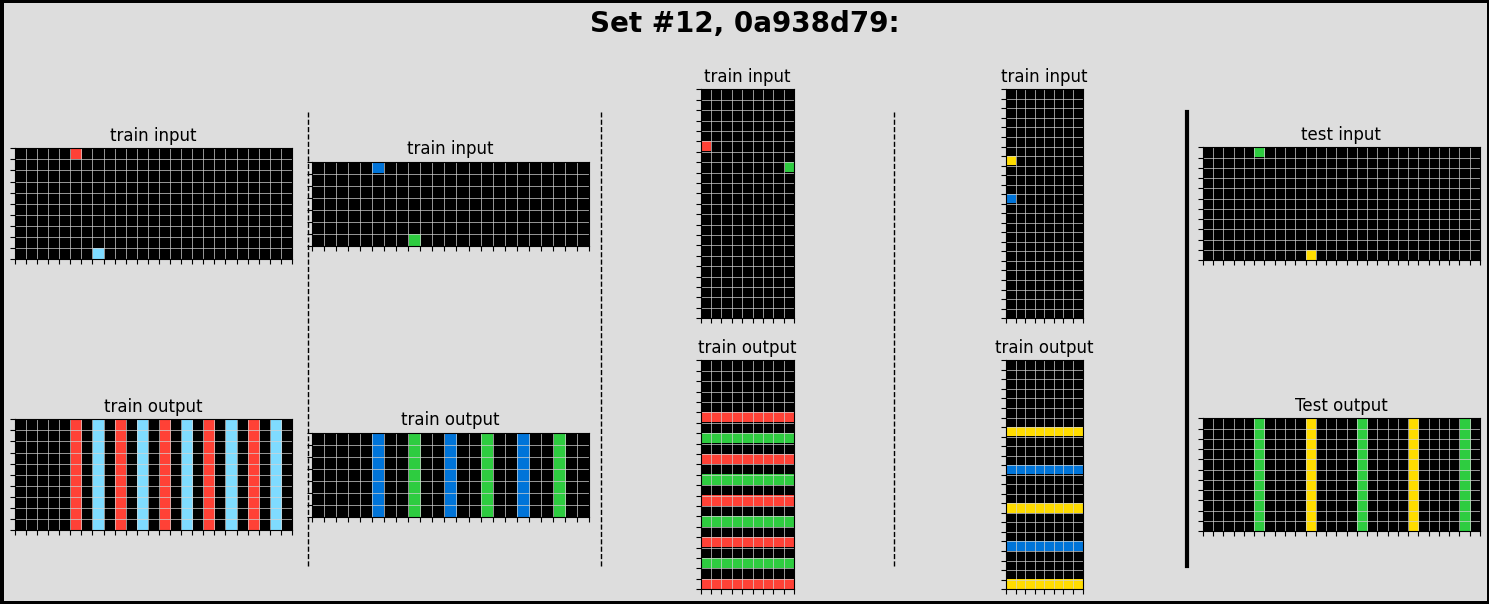



#13, 0b148d64


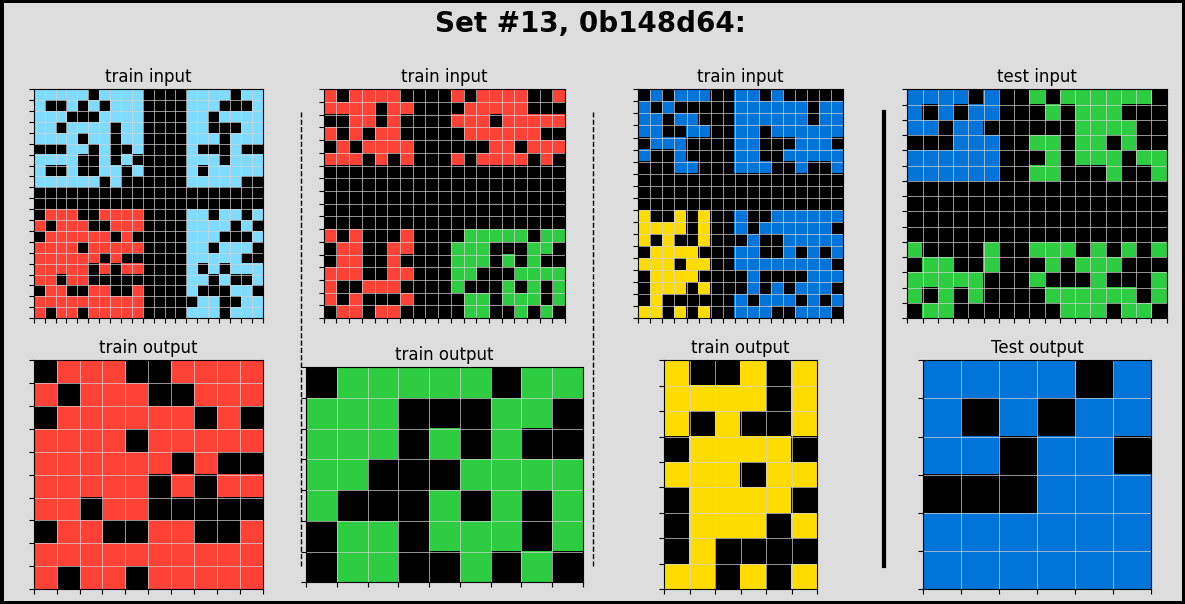



#14, 0ca9ddb6


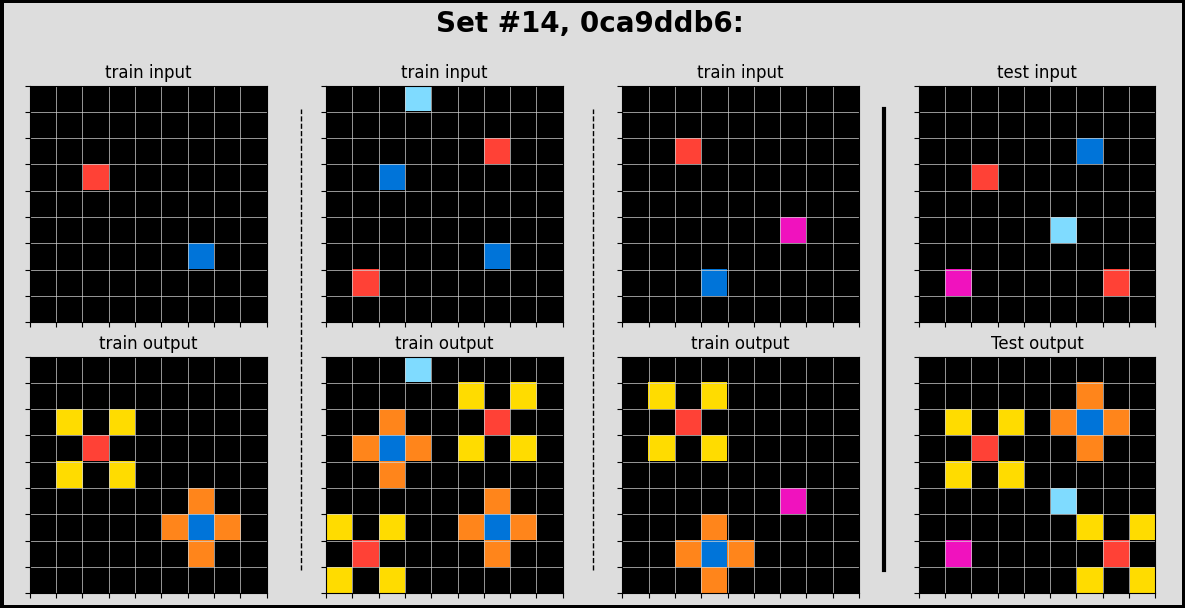



#15, 0d3d703e


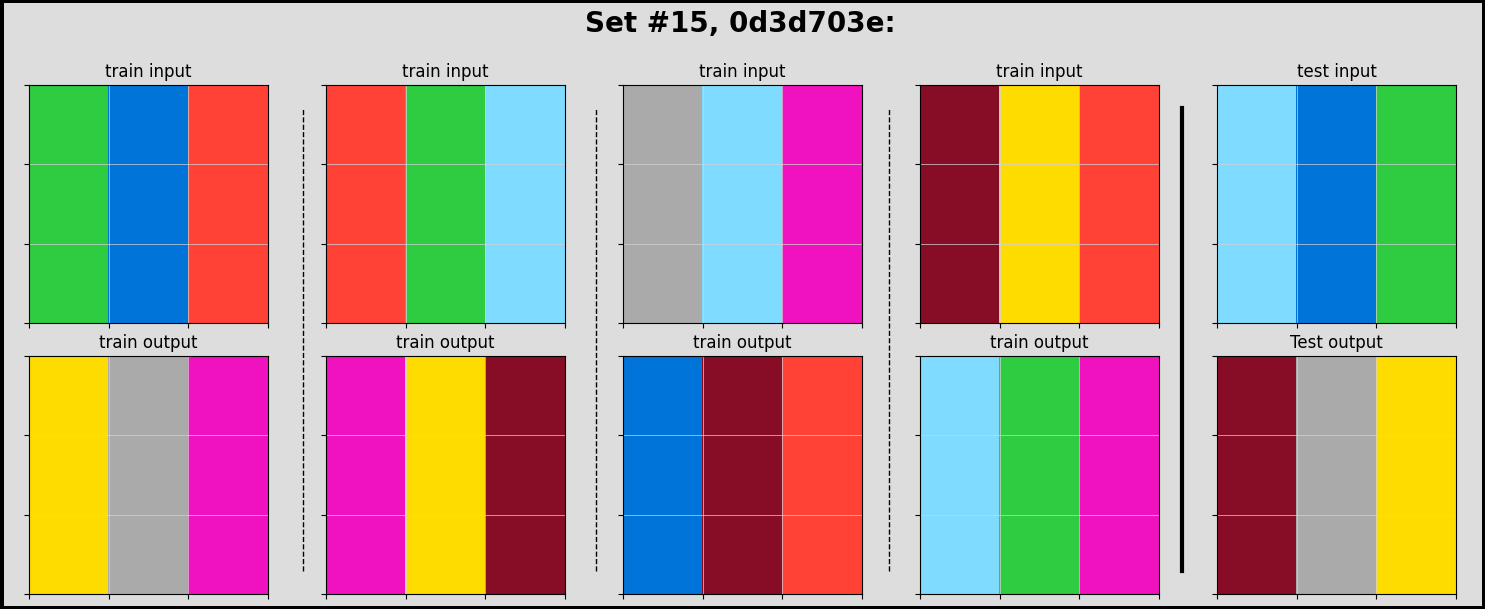



#16, 0dfd9992


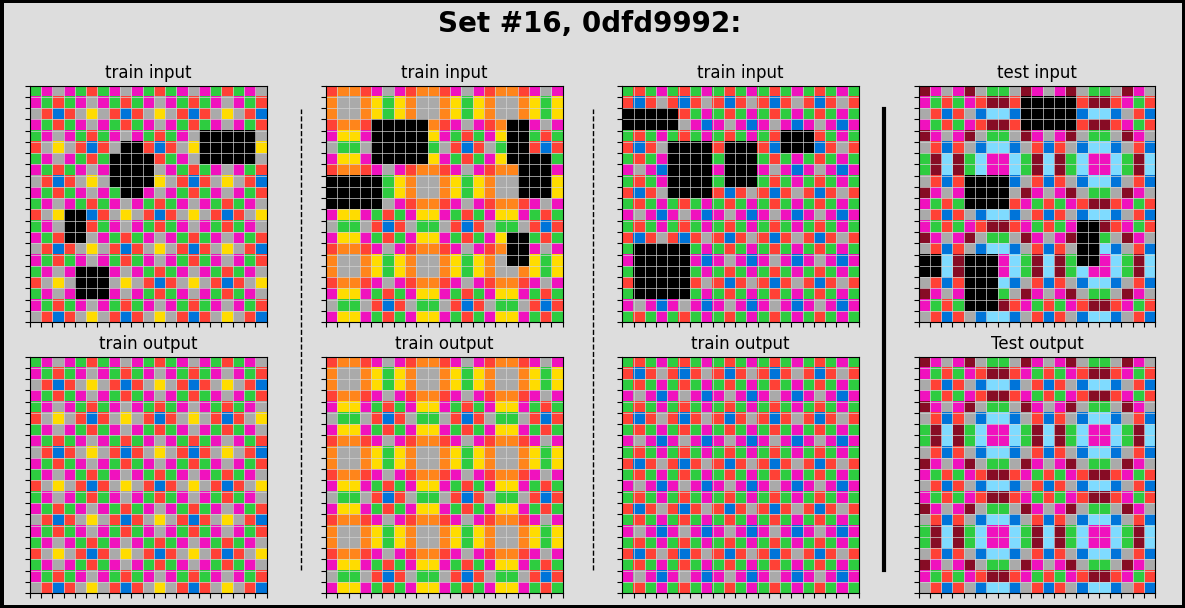



#17, 0e206a2e


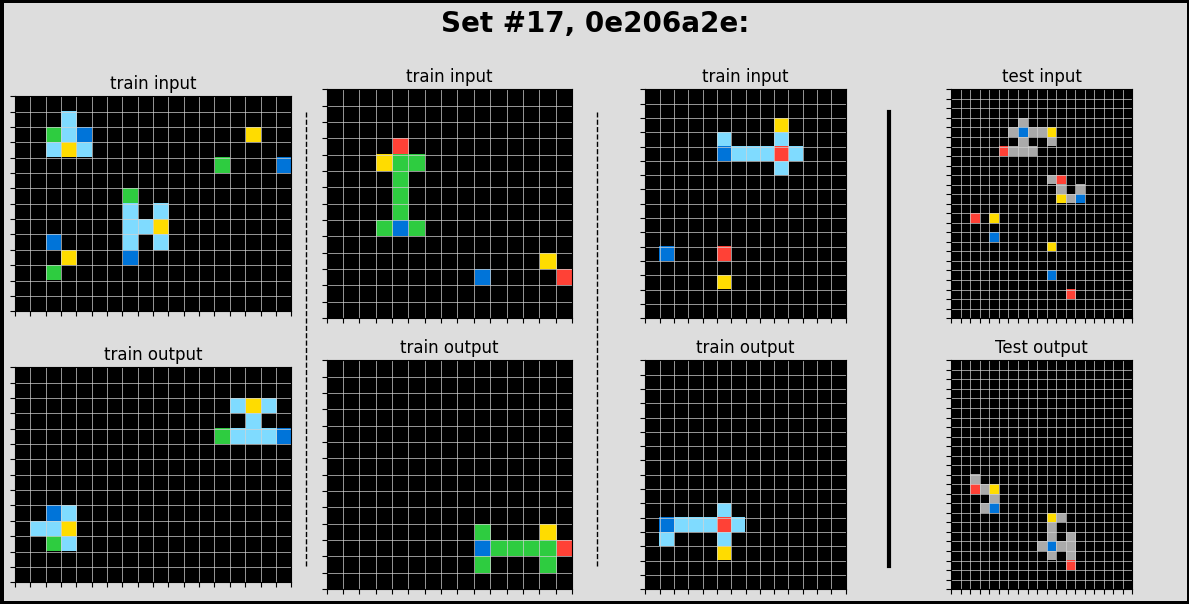



#18, 10fcaaa3


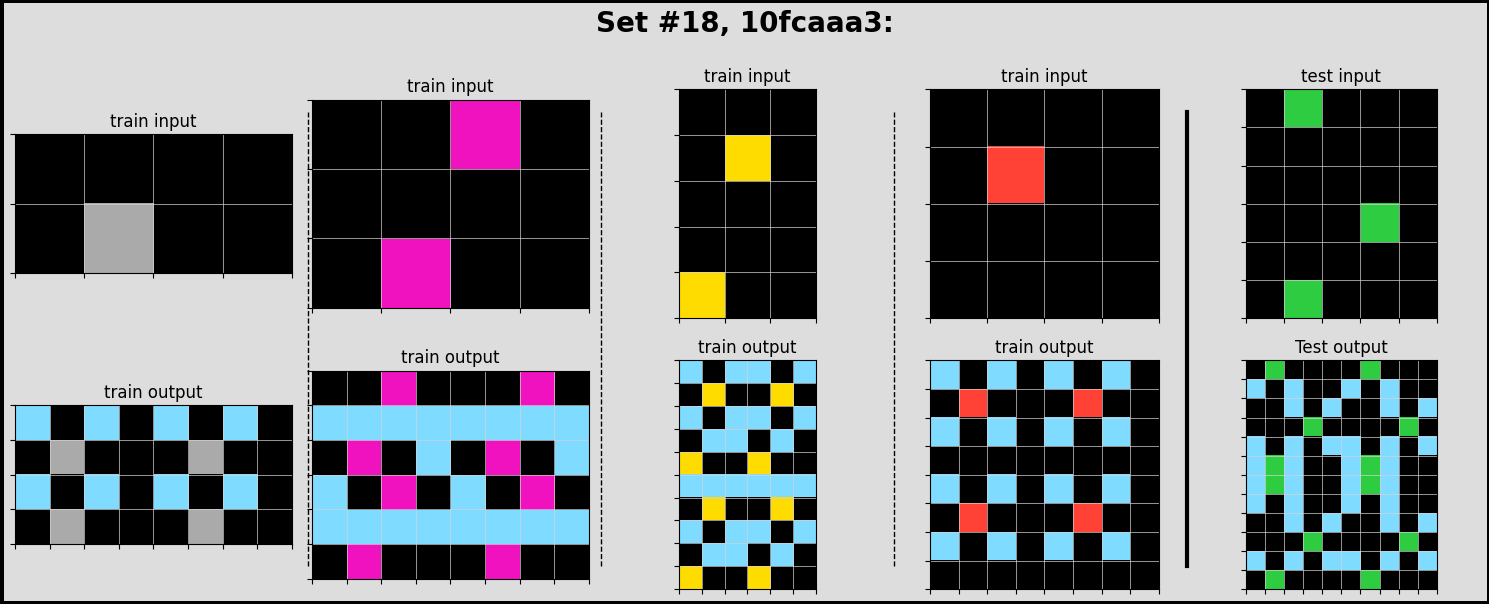



#19, 11852cab


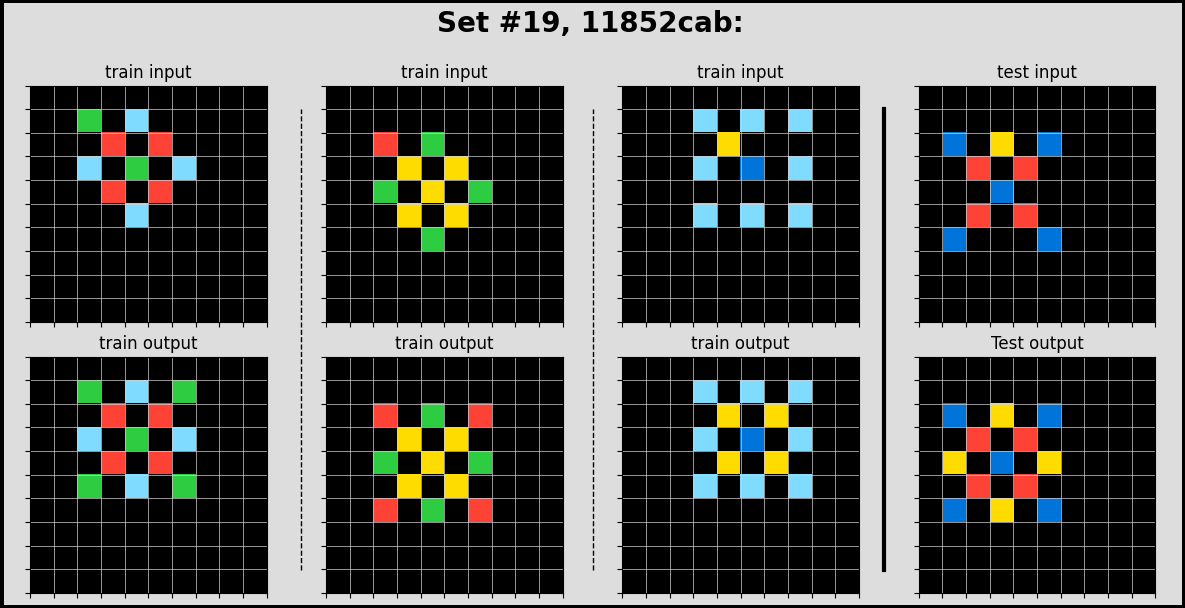

In [12]:
for i in range(0,20):
    t=list(training_challenges)[i]
    task=training_challenges[t]
    task_solution = training_solutions[t][0]
    plot_task(task,  task_solution, i, t)

#0, 00576224


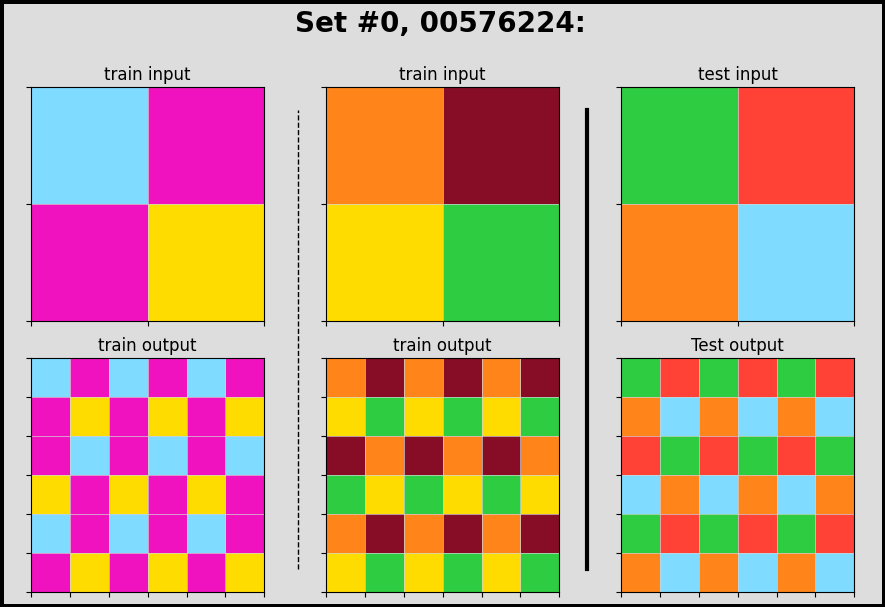



#1, 009d5c81


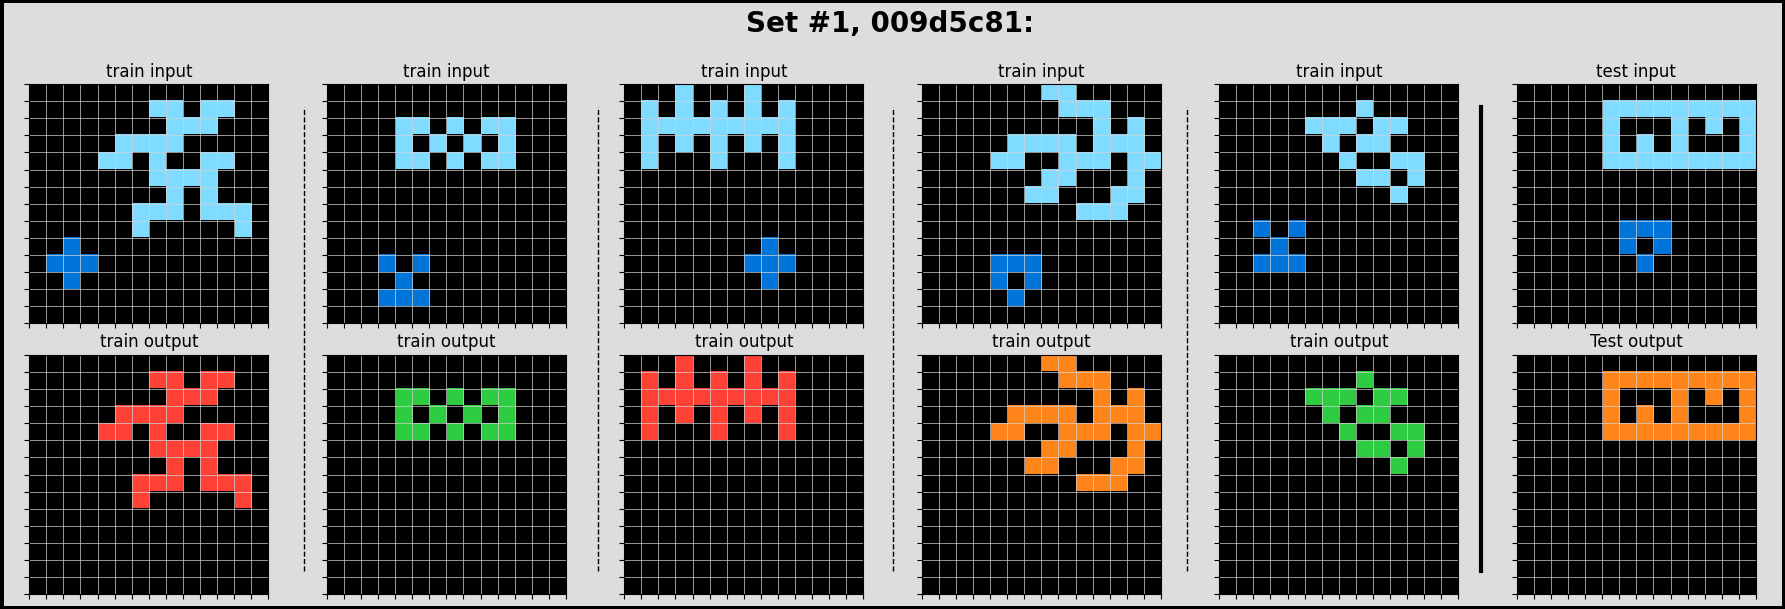



#2, 00dbd492


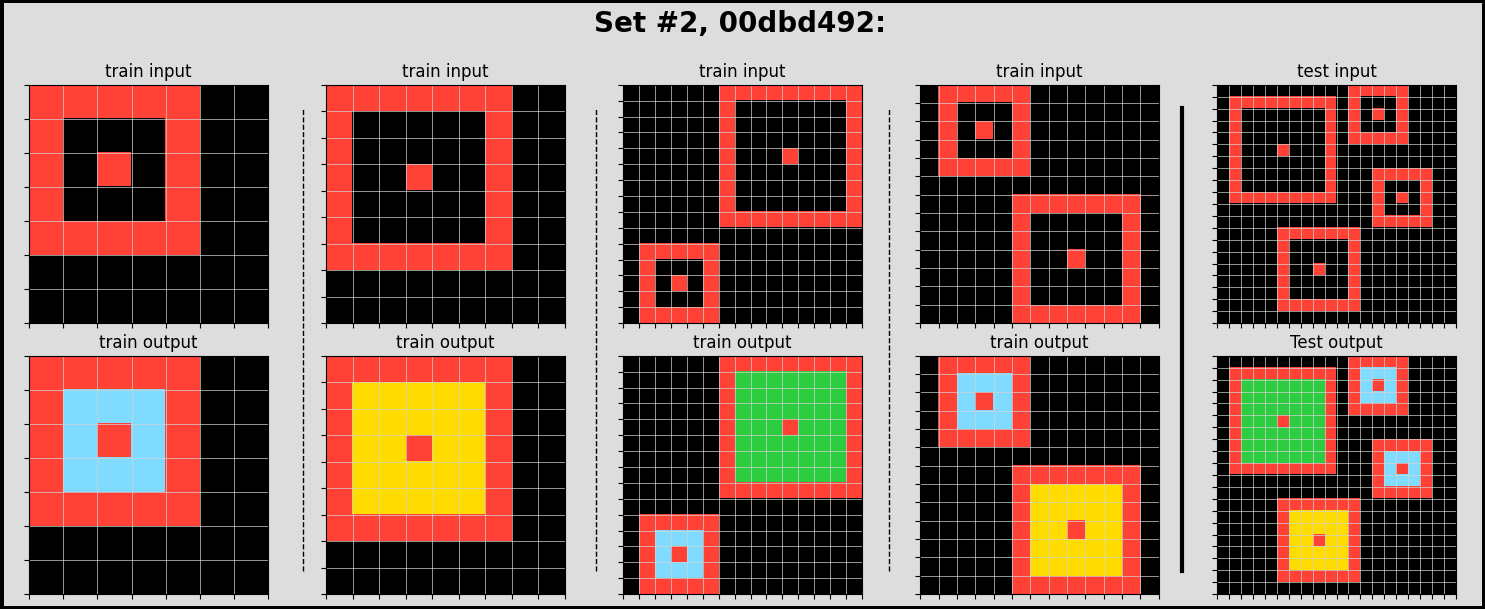



#3, 03560426


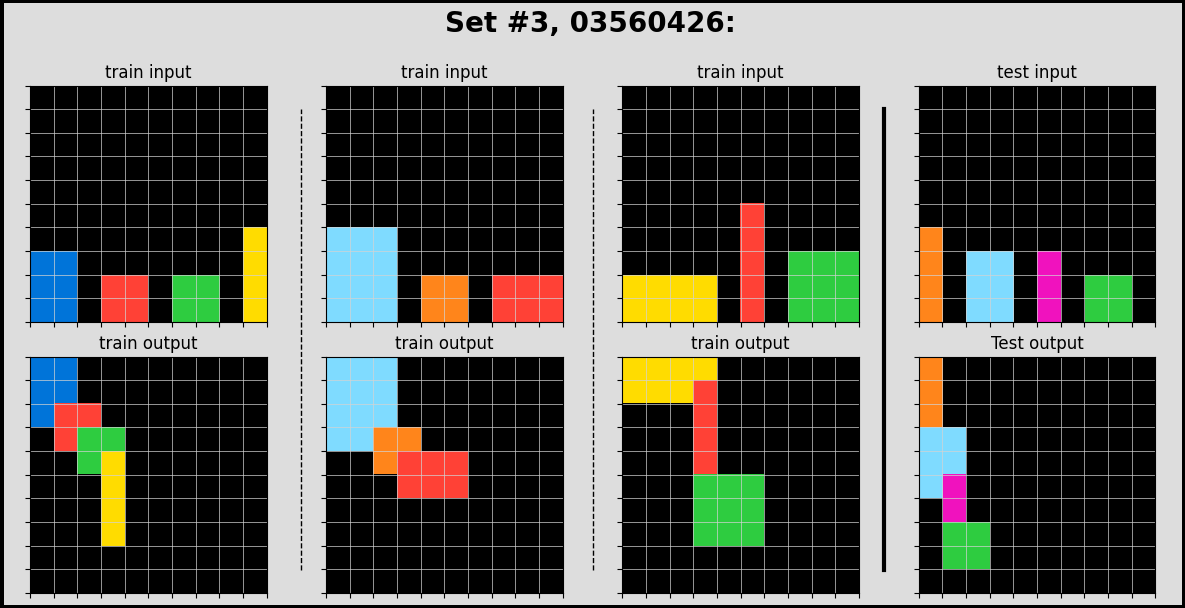



#4, 05a7bcf2


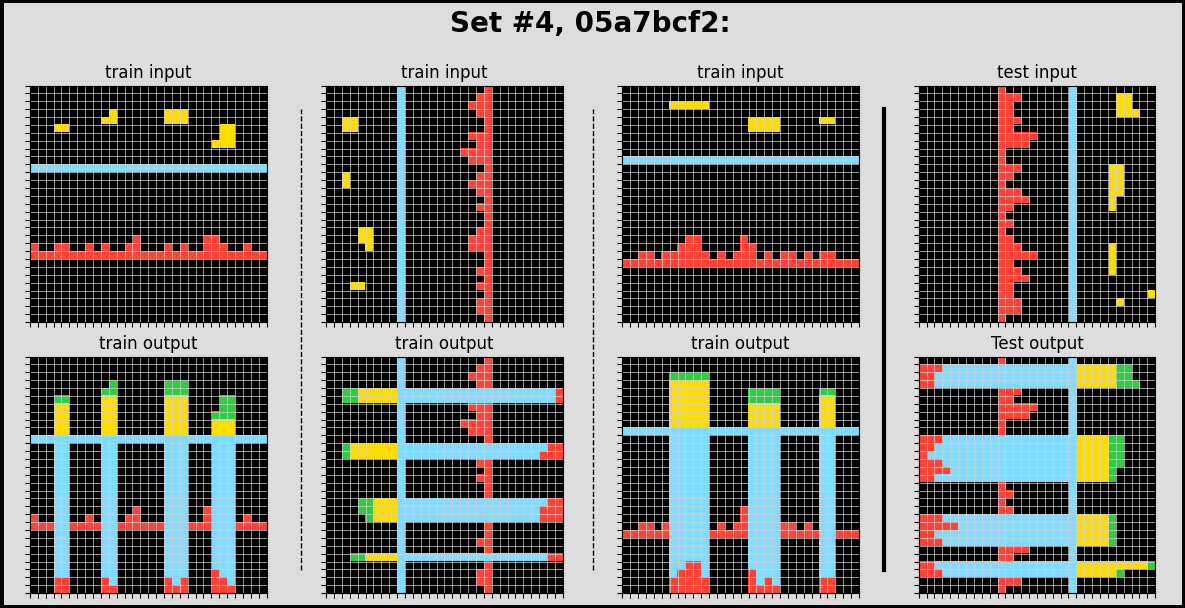



#5, 0607ce86


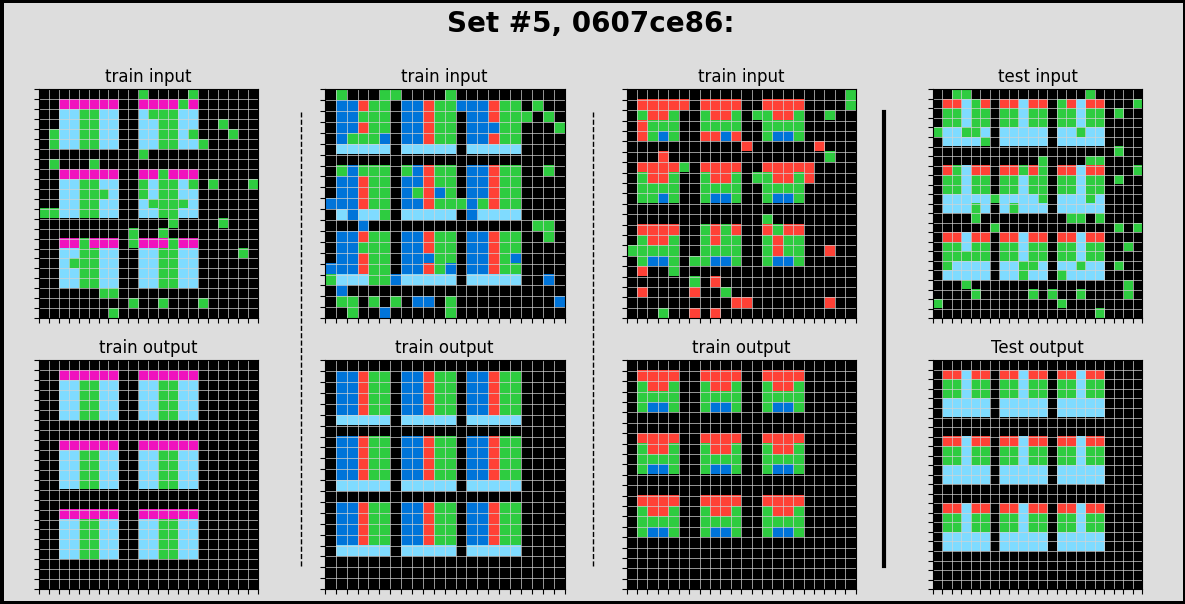



#6, 0692e18c


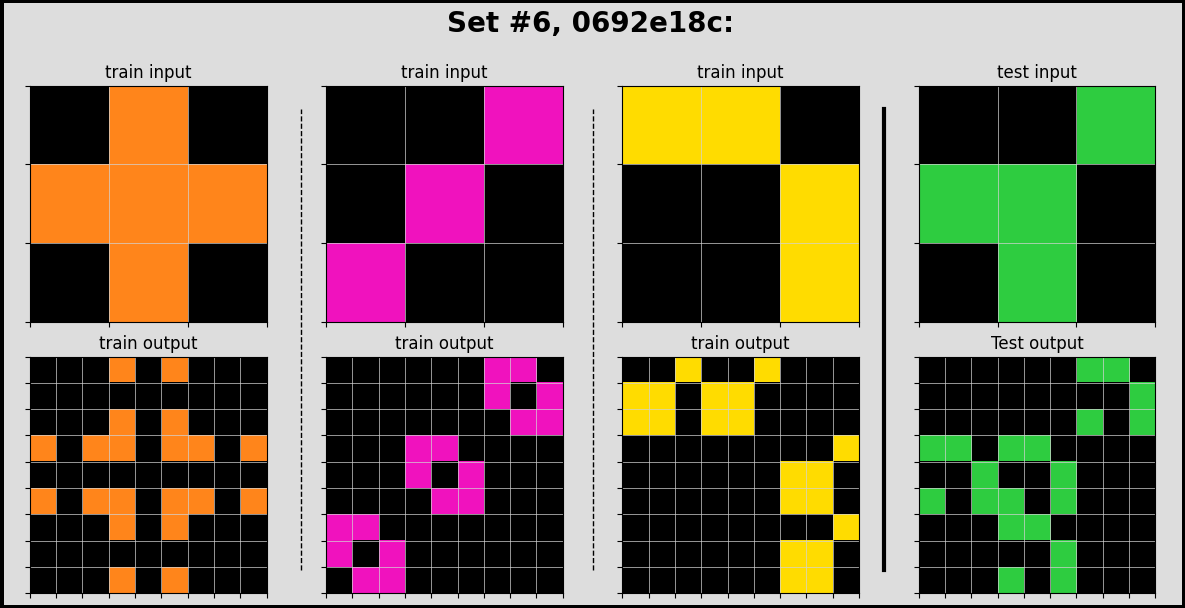



#7, 070dd51e


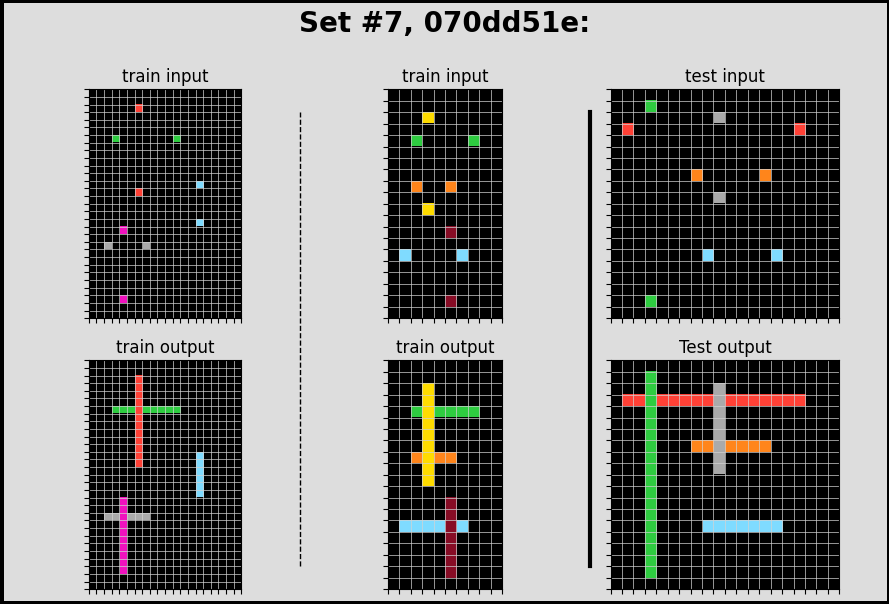



#8, 08573cc6


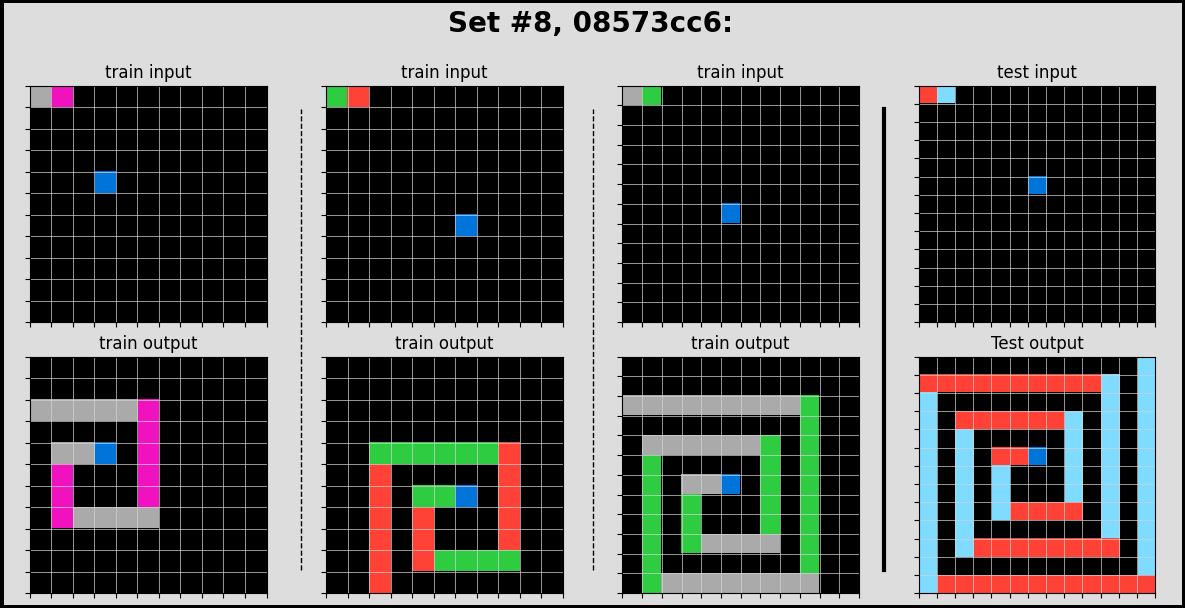



#9, 0934a4d8


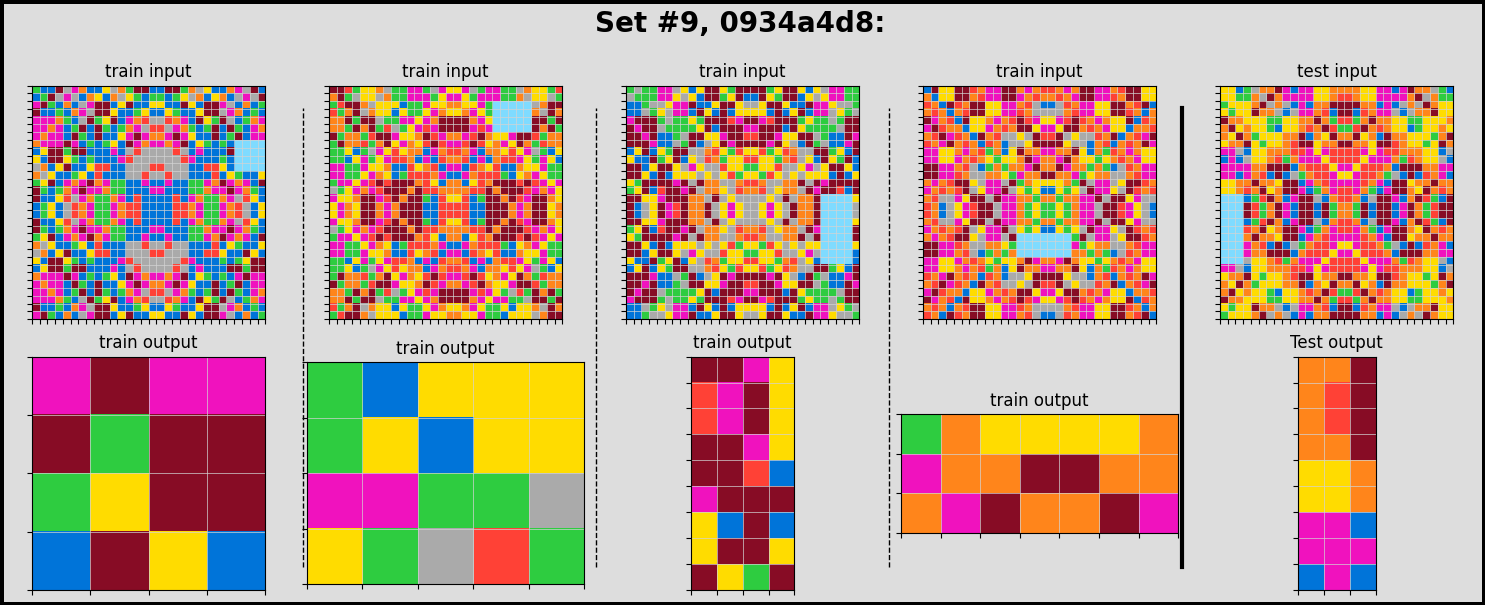



#10, 09c534e7


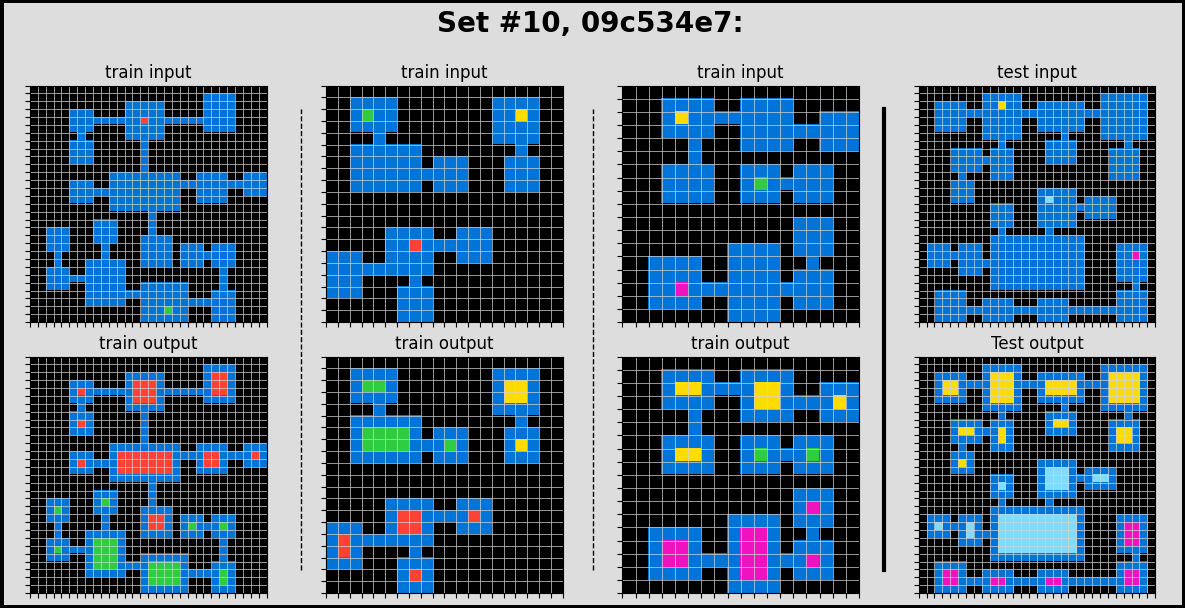



#11, 0a1d4ef5


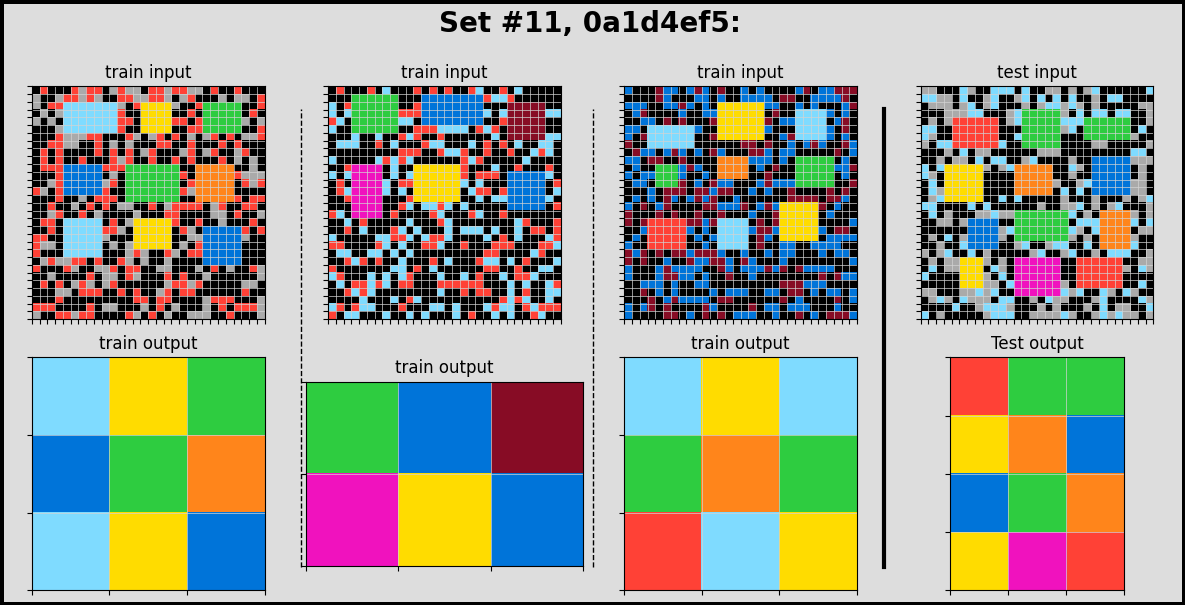



#12, 0a2355a6


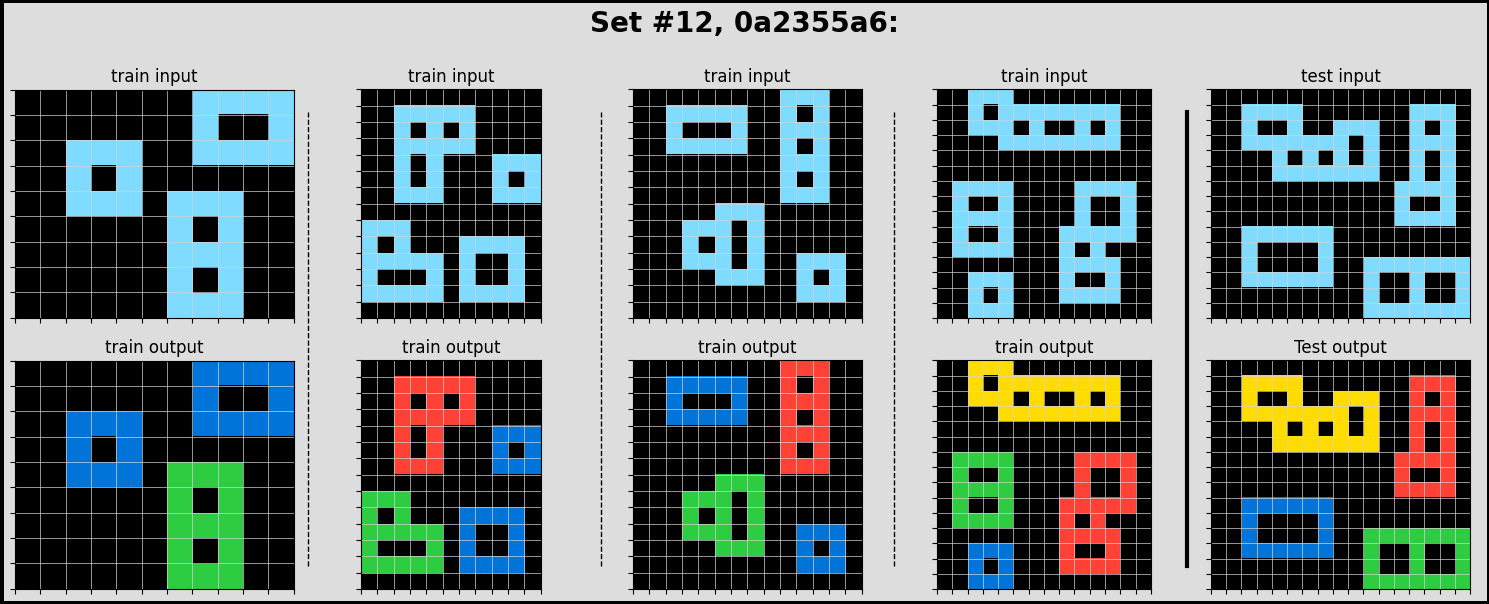



#13, 0b17323b


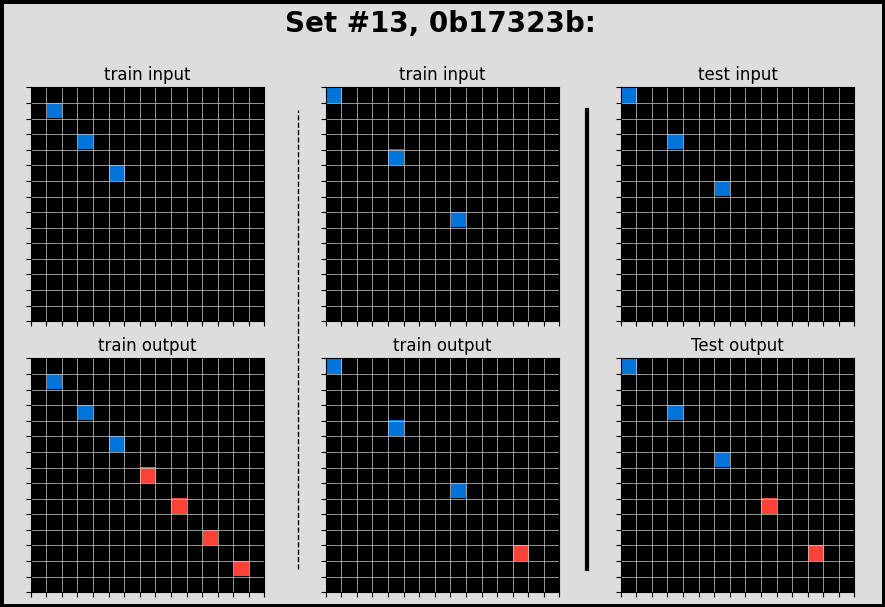



#14, 0bb8deee


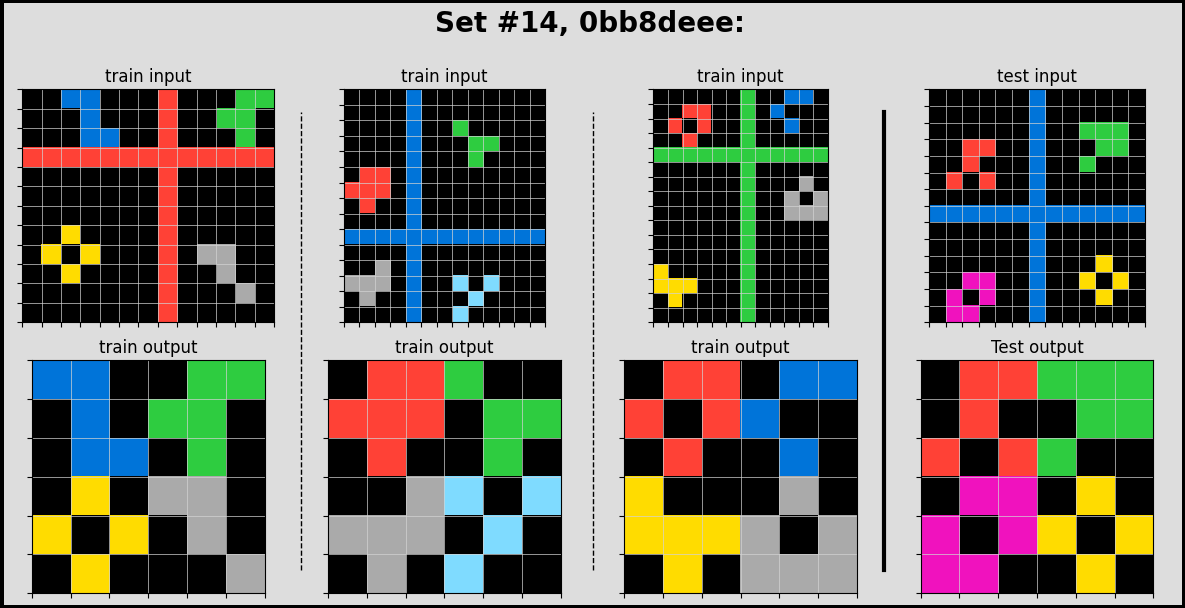



#15, 0becf7df


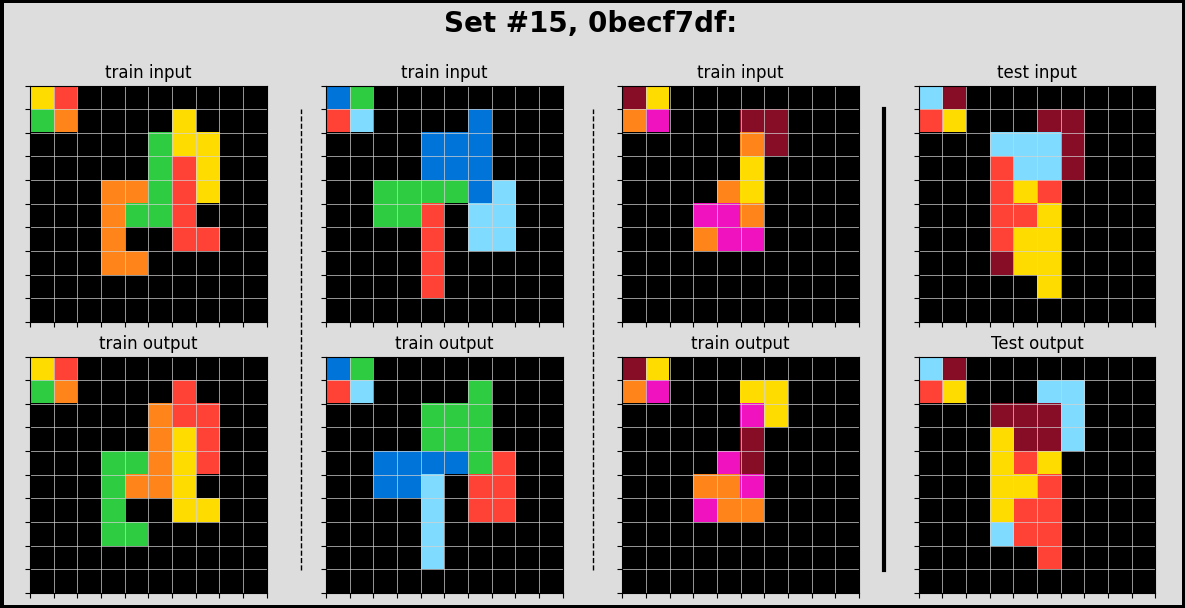



#16, 0c786b71


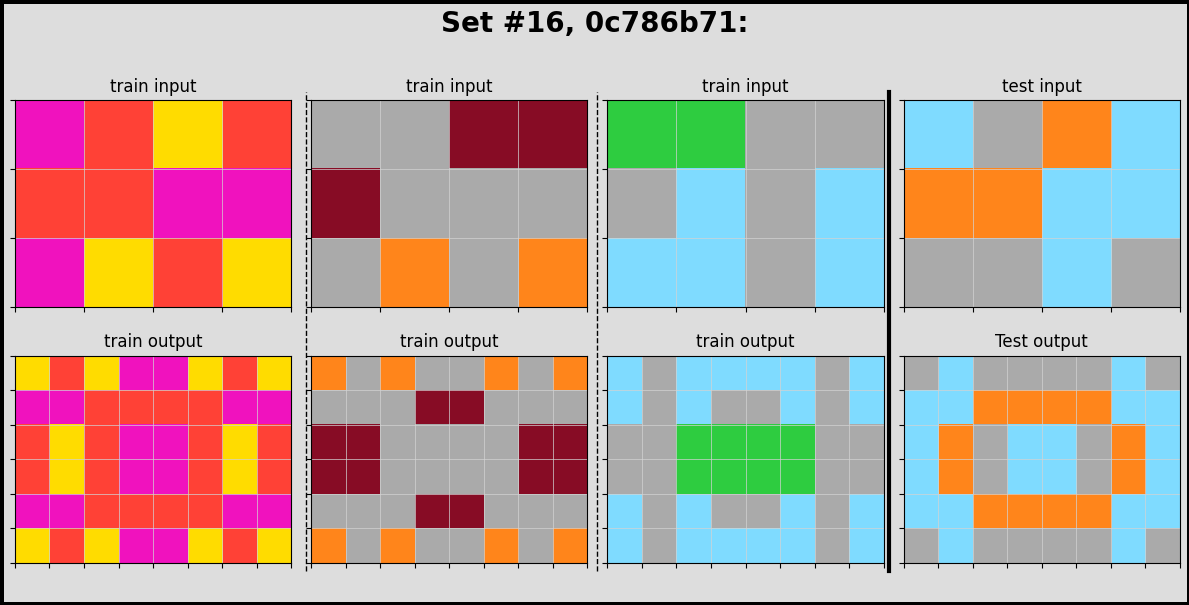



#17, 0c9aba6e


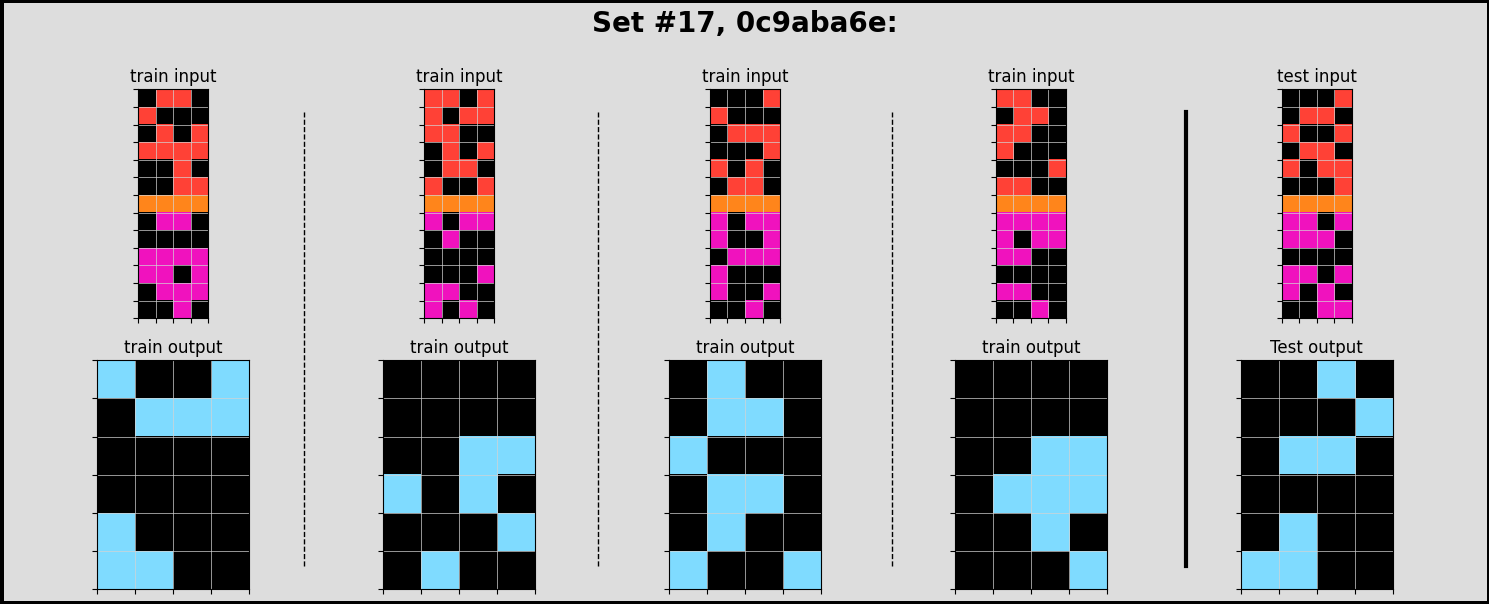



#18, 0d87d2a6


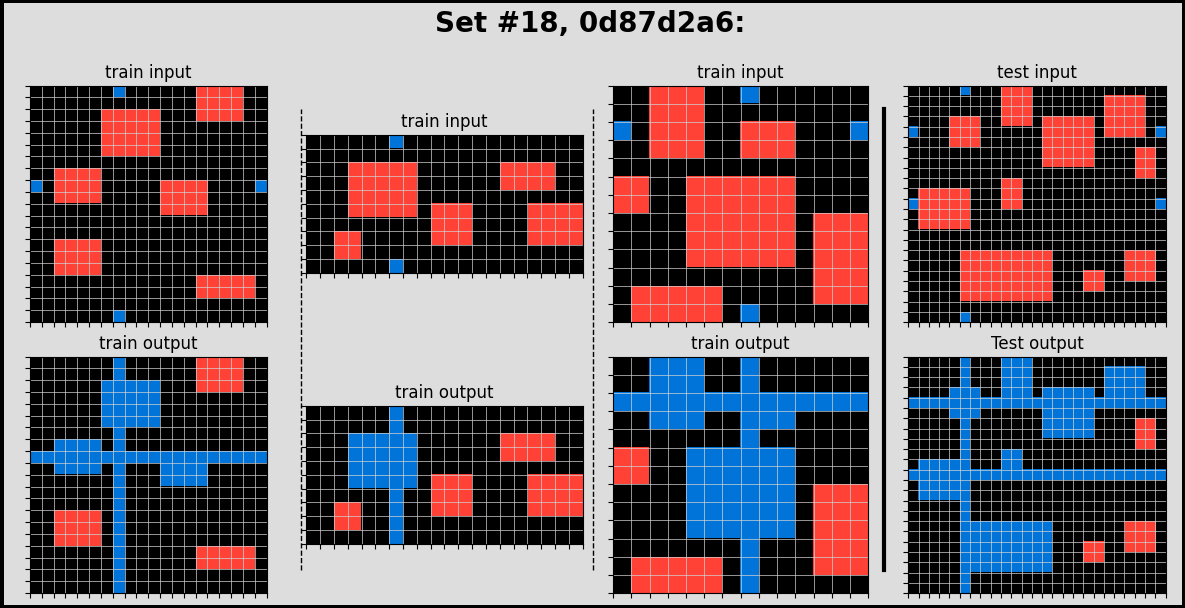



#19, 0e671a1a


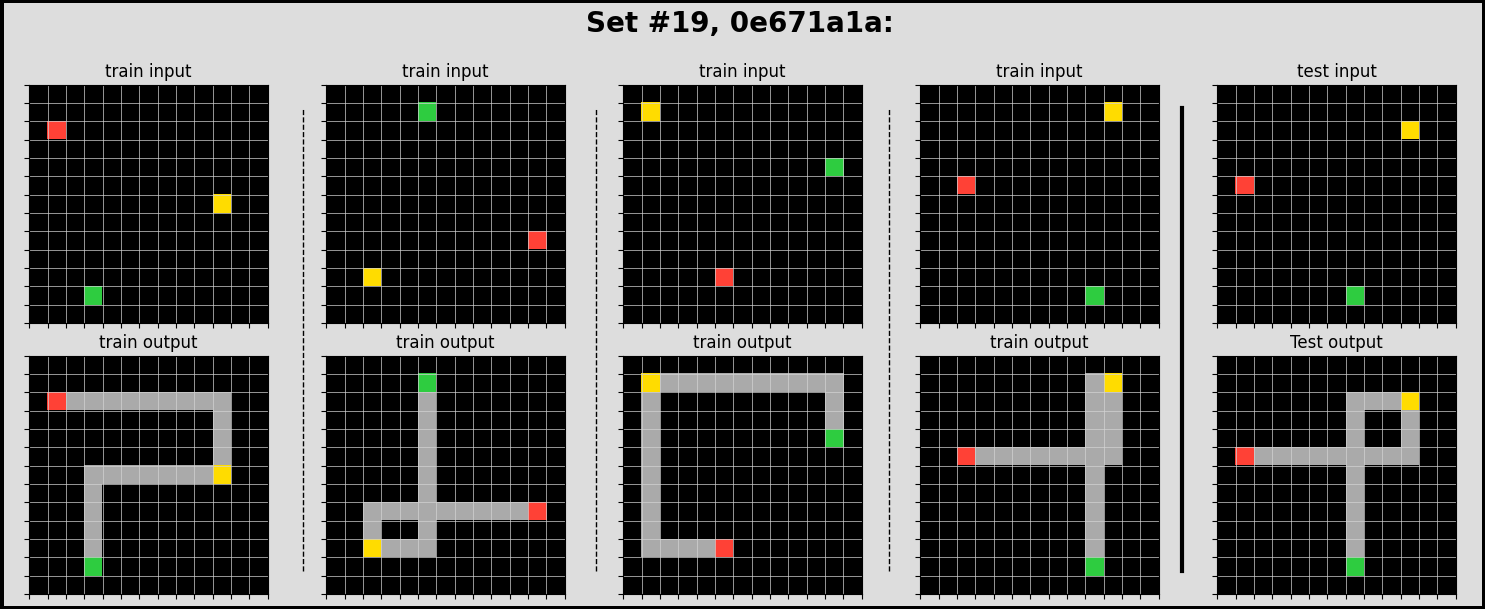

In [13]:
for i in range(0,20):
    t=list(evaluation_challenges)[i]
    task=evaluation_challenges[t]
    task_solution = evaluation_solutions[t][0]
    plot_task(task,  task_solution, i, t)